Tworzymy syntetyczny jednowymiarowy zbiór i dzielimy go na podzbiór testowy oraz treningowy

In [29]:
from sklearn import datasets
import sklearn.model_selection
import scipy.optimize
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import sklearn.linear_model
import time
from sklearn.metrics import mean_squared_error


index = 254460
seed = index
n_samples = 2560

dataset_X, dataset_Y = datasets.make_regression(n_samples=n_samples, n_features=1, noise=16, random_state=seed)
dataset_train_x, dataset_test_x, dataset_train_y, dataset_test_y = sklearn.model_selection.train_test_split(dataset_X, dataset_Y, test_size=.2, random_state=seed)

Wersja numeryczna regresji liniowej

In [30]:
def loss(theta, X, y):
    return (y.T-(X@theta.T)).T@(y.T-(X@theta.T))

X = np.ones((2, len(dataset_train_x)))
y = np.array(dataset_train_y)
start_theta = np.random.randint(-10, 10 + 1, size=(2,))
X[1,:] = dataset_train_x.T
X = X.T
start = time.time()
res = scipy.optimize.minimize(loss, start_theta, method='Powell', args=(X, y))
end = time.time()
print(f"Czas obliczeń wersji numerycznej = {end - start}")
a_N = res.x[1]
b_N = res.x[0]
teta_N = res.x
xs_N = np.array([-4, 3])
ys_N = xs_N*a_N+b_N


Czas obliczeń wersji numerycznej = 0.0


Wersja analityczna regresji liniowej

In [31]:
start = time.time()
teta_A = np.linalg.inv(X.T@X)@X.T@y
end = time.time()
print(f"Czas obliczeń wersji analitycznej = {end - start}")
a_A = teta_A[1]
b_A = teta_A[0]
xs_A = np.array([-4, 3])
ys_A = xs_A*a_A+b_A

Czas obliczeń wersji analitycznej = 0.0


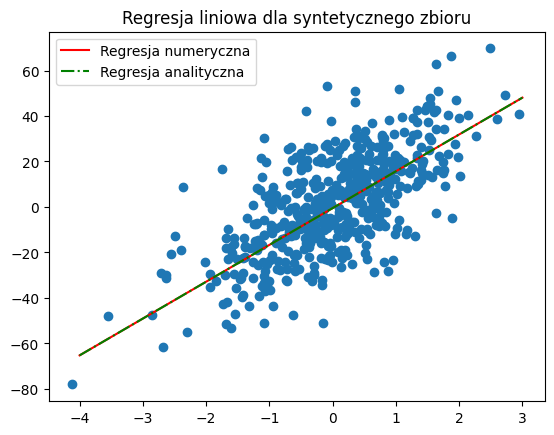

In [32]:
plt.scatter(dataset_test_x, dataset_test_y)
plt.plot(xs_N, ys_N, c="r", label='Regresja numeryczna')
plt.plot(xs_A, ys_A, c="g", label='Regresja analityczna', linestyle='-.')
plt.title('Regresja liniowa dla syntetycznego zbioru')
plt.legend()
plt.show()

Obliczenie MSE dla obu metod

In [33]:
def mse_for_points(X_point, Y_points, teta, with_one):
    X_point_with_ones = X_point
    if not with_one:
        num_rows = X_point.shape[0]
        ones_column = np.ones((num_rows, 1))
        X_point_with_ones = np.hstack((ones_column, X_point))
    predicted_values = X_point_with_ones@teta
    mse = mean_squared_error(Y_points, predicted_values)
    return mse

print(f"MSE dla wersji analitycznej {mse_for_points(dataset_test_x, dataset_test_y, teta_A, with_one=False)}")
print(f"MSE dla wersji numerycznej {mse_for_points(dataset_test_x, dataset_test_y, teta_N, with_one=False)}")

MSE dla wersji analitycznej 277.51773130596496
MSE dla wersji numerycznej 277.5177284413392


Otrzymane wyniki dla obu metod są niemal identyczne jeśli chodzi o wartości MSE. Modele nie odbiegają od siebie w kwestii dokładności. Należy jednak zwrócić uwalę na krótszy czas tworzenia modelu analitycznego, względem rozwiązania numerycznego.

Wybór zbioru do analizy

In [34]:

my_data = np.genfromtxt('single_points.csv', delimiter=',')
X_points = my_data[:,0].reshape(1, -1)
Y_points = my_data[:,1].reshape(1, -1)
scaler = preprocessing.MinMaxScaler()
X_points_N = scaler.fit_transform(X_points.reshape(-1, 1))
Y_points_N = scaler.fit_transform(Y_points.reshape(-1, 1))

Implementacja regresji na podstawie Sklearn (stopień 21)

In [35]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=21)
X_poly_S = poly.fit_transform(X_points_N)
model = sklearn.linear_model.LinearRegression()
model.fit(X_poly_S, Y_points_N)
teta_S = model.coef_
end = time.time()
print(f"Czas obliczeń implementacji Sklearn = {end - start}")

X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

Czas obliczeń implementacji Sklearn = 0.0010001659393310547


Implementacja regresji liniowej w sposób analityczny (stopień 21)

Czas obliczeń implementacji analitycznej = 0.0010306835174560547


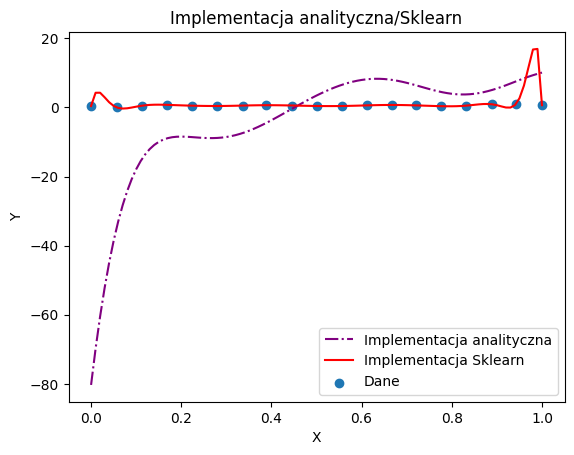

In [36]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=21)
X_poly_A = poly.fit_transform(X_points_N)
teta_A = np.linalg.inv(X_poly_A.T@X_poly_A)@X_poly_A.T@Y_points_N
end = time.time()
print(f"Czas obliczeń implementacji analitycznej = {end - start}")
X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_p = poly.fit_transform(X_test)
y_test = X_test_p@teta_A
plt.plot(X_test, y_test, c="purple", label='Implementacja analityczna', linestyle='-.')
plt.plot(X_test, y_pred, color='r', label='Implementacja Sklearn')
plt.scatter(X_points_N, Y_points_N, label='Dane')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Implementacja analityczna/Sklearn')
plt.legend()
plt.show()

Implementacja regresji na podstawie Sklearn (stopień 9)

In [37]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=9)
X_poly_S = poly.fit_transform(X_points_N)
model = sklearn.linear_model.LinearRegression()
model.fit(X_poly_S, Y_points_N)
teta_S = model.coef_
end = time.time()
print(f"Czas obliczeń implementacji Sklearn = {end - start}")

X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

Czas obliczeń implementacji Sklearn = 0.001001119613647461


Implementacja regresji liniowej w sposób analityczny (stopień 9)

Czas obliczeń implementacji analitycznej = 0.0


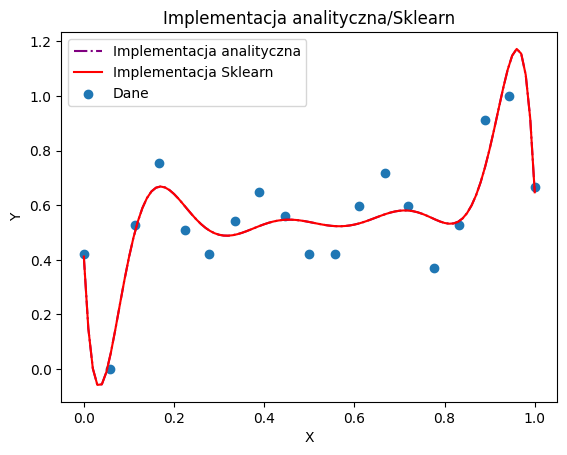

In [38]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=9)
X_poly_A = poly.fit_transform(X_points_N)
teta_A = np.linalg.inv(X_poly_A.T@X_poly_A)@X_poly_A.T@Y_points_N
end = time.time()
print(f"Czas obliczeń implementacji analitycznej = {end - start}")
X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_p = poly.fit_transform(X_test)
y_test = X_test_p@teta_A
plt.plot(X_test, y_test, c="purple", label='Implementacja analityczna', linestyle='-.')
plt.plot(X_test, y_pred, color='r', label='Implementacja Sklearn')
plt.scatter(X_points_N, Y_points_N, label='Dane')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Implementacja analityczna/Sklearn')
plt.legend()
plt.show()

Obliczenie MSE dla obu metod

In [39]:
print(f"MSE dla wersji analitycznej {mse_for_points(X_poly_A, Y_points_N, teta_A, with_one=True)}")
print(f"MSE dla wersji sklearn {mse_for_points(X_poly_S, Y_points_N, teta_S.T, with_one=True)}")

MSE dla wersji analitycznej 0.00901150686685256
MSE dla wersji sklearn 0.17885699321260073


Dla wielomianów stopnia 9 rozwiązania generowane przez obie metody można uznać identyczne dla każdego z 3 przypadków. Natomiast dla wielomianów 21 stopnia metoda analityczna dla żadnego z 3 przypadków nie generuje zadowalającego rozwiązania. Taki stan rzeczy najprawdopodobniej powodowany jest rosnącą długością wektora teta normy L2 co związane jest z niewystarczającą ilością próbek względem ilości współczynników wielomianu. Metoda biblioteki sklearn musi wykorzystywać dodatkowe zależności, których brak zaimplementowanej metodzie analitycznej, gdyż nawet w sytuacji gdy próbek jest mniej niż współczynników wielomianu jest w stanie generować w pełni akceptowalne rezultaty co obrazuje otrzymana wartość MSE. Metoda analityczna jest metodą szybszą, co widać wyraźnie gdy operujemy na wielomianach wysokich stopni.

Implementacja ridge regression z wykorzystaniem biblioteki Sklearn

In [40]:
start = time.time()
model_R = sklearn.linear_model.Ridge(alpha = 0.000000000003, fit_intercept=False)
poly = preprocessing.PolynomialFeatures(degree=16)
X_poly_R = poly.fit_transform(X_points_N)
model_R.fit(X_poly_R, Y_points_N)
end = time.time()
print(f"Czas obliczeń rozwiązania Sklearn = {end - start}")
teta_R = model_R.coef_
X_test_R = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_poly = poly.transform(X_test_R)
y_pred_R = model_R.predict(X_test_poly)

Czas obliczeń rozwiązania Sklearn = 0.002974987030029297


Własna implementacja ridge regression

Czas obliczeń stworzonego rozwiązania = 0.011457204818725586


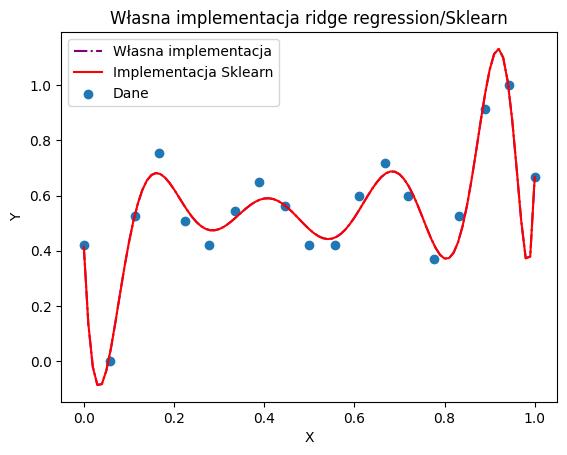

In [41]:
ALFA = 0.000000000003


poly = preprocessing.PolynomialFeatures(degree=16, include_bias=True)
X_poly_T = poly.fit_transform(X_points_N)
teta_T = np.linalg.inv(X_poly_T.T@X_poly_T+ALFA*np.eye(X_poly_T.shape[1]))@X_poly_T.T@Y_points_N
end = time.time()
print(f"Czas obliczeń stworzonego rozwiązania = {end - start}")
X_test_T = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_poly_t = poly.fit_transform(X_test)
y_pred_T = X_poly_t@teta_T

plt.plot(X_test_T, y_pred_T, color='purple', label='Własna implementacja', linestyle='-.')
plt.plot(X_test_R, y_pred_R, c="r", label='Implementacja Sklearn')
plt.scatter(X_points_N, Y_points_N, label='Dane')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Własna implementacja ridge regression/Sklearn')
plt.legend()
plt.show()

Obliczenie MSE dla obu metod

In [42]:
print(f"MSE dla rozwiązania Skrearn {mse_for_points(X_poly_R, Y_points_N, teta_R.T, with_one=True)}")
print(f"MSE dla stworzonego rozwiązania {mse_for_points(X_poly_T, Y_points_N, teta_T, with_one=True)}")

MSE dla rozwiązania Skrearn 0.0020013311889279474
MSE dla stworzonego rozwiązania 0.0020013280308462146


Zastosowanie regularyzacji L2 w omawianym przykładzie przynosi wymierne korzyści. W przypadku zawierającym pełny zapis z gry MSE udało się zmniejszyć o 3 rzędy wartości, dzięki czemu stworzony wcześniej model, który nie można było uznać za dopuszczalny, może znaleźć zastosowanie. Własna implementacja osiąga niemal identyczne wyniki w porównaniu z metodą biblioteki sklearn.

In [43]:
my_data = np.genfromtxt('key_points.csv', delimiter=',')
X_points = my_data[:,0].reshape(1, -1)
Y_points = my_data[:,1].reshape(1, -1)
scaler = preprocessing.MinMaxScaler()
X_points_N = scaler.fit_transform(X_points.reshape(-1, 1))
Y_points_N = scaler.fit_transform(Y_points.reshape(-1, 1))

Implementacja regresji na podstawie Sklearn (stopień 21)

In [44]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=21)
X_poly_S = poly.fit_transform(X_points_N)
model = sklearn.linear_model.LinearRegression()
model.fit(X_poly_S, Y_points_N)
teta_S = model.coef_
end = time.time()
print(f"Czas obliczeń implementacji Sklearn = {end - start}")

X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

Czas obliczeń implementacji Sklearn = 0.0010001659393310547


Implementacja regresji liniowej w sposób analityczny (stopień 21)

Czas obliczeń implementacji analitycznej = 0.0


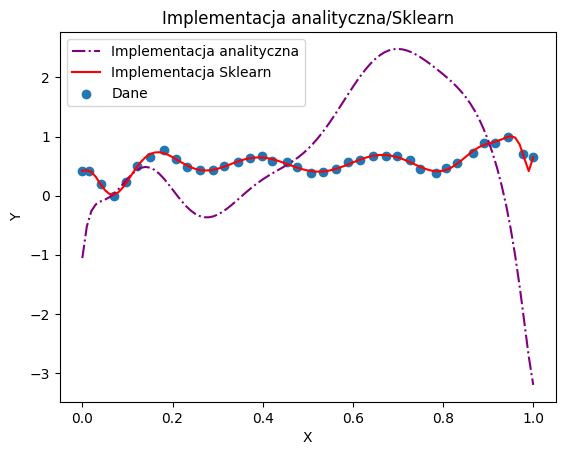

In [45]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=21)
X_poly_A = poly.fit_transform(X_points_N)
teta_A = np.linalg.inv(X_poly_A.T@X_poly_A)@X_poly_A.T@Y_points_N
end = time.time()
print(f"Czas obliczeń implementacji analitycznej = {end - start}")
X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_p = poly.fit_transform(X_test)
y_test = X_test_p@teta_A
plt.plot(X_test, y_test, c="purple", label='Implementacja analityczna', linestyle='-.')
plt.plot(X_test, y_pred, color='r', label='Implementacja Sklearn')
plt.scatter(X_points_N, Y_points_N, label='Dane')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Implementacja analityczna/Sklearn')
plt.legend()
plt.show()

Implementacja regresji na podstawie Sklearn (stopień 9)

In [46]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=9)
X_poly_S = poly.fit_transform(X_points_N)
model = sklearn.linear_model.LinearRegression()
model.fit(X_poly_S, Y_points_N)
teta_S = model.coef_
end = time.time()
print(f"Czas obliczeń implementacji Sklearn = {end - start}")

X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

Czas obliczeń implementacji Sklearn = 0.0019996166229248047


Implementacja regresji liniowej w sposób analityczny (stopień 9)

Czas obliczeń implementacji analitycznej = 0.0020515918731689453


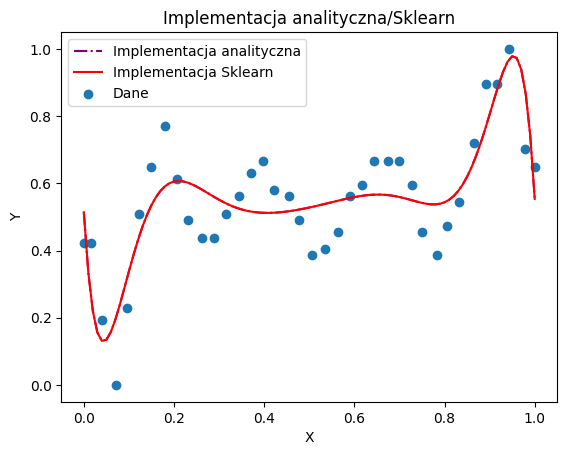

In [47]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=9)
X_poly_A = poly.fit_transform(X_points_N)
teta_A = np.linalg.inv(X_poly_A.T@X_poly_A)@X_poly_A.T@Y_points_N
end = time.time()
print(f"Czas obliczeń implementacji analitycznej = {end - start}")
X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_p = poly.fit_transform(X_test)
y_test = X_test_p@teta_A
plt.plot(X_test, y_test, c="purple", label='Implementacja analityczna', linestyle='-.')
plt.plot(X_test, y_pred, color='r', label='Implementacja Sklearn')
plt.scatter(X_points_N, Y_points_N, label='Dane')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Implementacja analityczna/Sklearn')
plt.legend()
plt.show()

Implementacja ridge regression z wykorzystaniem biblioteki Sklearn

In [48]:
start = time.time()
model_R = sklearn.linear_model.Ridge(alpha = 0.000000000003, fit_intercept=False)
poly = preprocessing.PolynomialFeatures(degree=16)
X_poly_R = poly.fit_transform(X_points_N)
model_R.fit(X_poly_R, Y_points_N)
end = time.time()
print(f"Czas obliczeń rozwiązania Sklearn = {end - start}")
teta_R = model_R.coef_
X_test_R = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_poly = poly.transform(X_test_R)
y_pred_R = model_R.predict(X_test_poly)

Czas obliczeń rozwiązania Sklearn = 0.0


Własna implementacja ridge regression

Czas obliczeń stworzonego rozwiązania = 0.010074377059936523


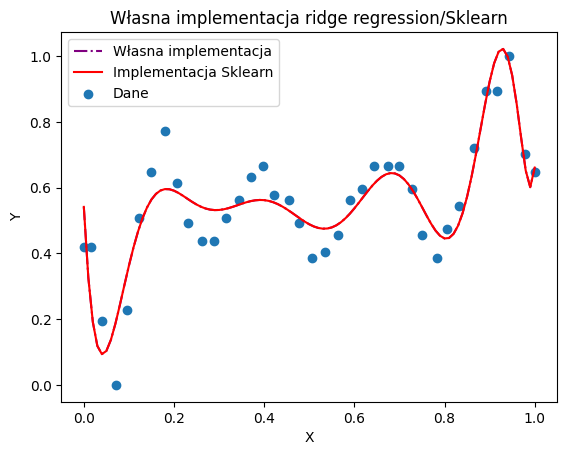

In [49]:
ALFA = 0.000000000003


poly = preprocessing.PolynomialFeatures(degree=16, include_bias=True)
X_poly_T = poly.fit_transform(X_points_N)
teta_T = np.linalg.inv(X_poly_T.T@X_poly_T+ALFA*np.eye(X_poly_T.shape[1]))@X_poly_T.T@Y_points_N
end = time.time()
print(f"Czas obliczeń stworzonego rozwiązania = {end - start}")
X_test_T = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_poly_t = poly.fit_transform(X_test)
y_pred_T = X_poly_t@teta_T

plt.plot(X_test_T, y_pred_T, color='purple', label='Własna implementacja', linestyle='-.')
plt.plot(X_test_R, y_pred_R, c="r", label='Implementacja Sklearn')
plt.scatter(X_points_N, Y_points_N, label='Dane')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Własna implementacja ridge regression/Sklearn')
plt.legend()
plt.show()

In [50]:
my_data = np.genfromtxt('all_points.csv', delimiter=',')
X_points = my_data[:,0].reshape(1, -1)
Y_points = my_data[:,1].reshape(1, -1)
scaler = preprocessing.MinMaxScaler()
X_points_N = scaler.fit_transform(X_points.reshape(-1, 1))
Y_points_N = scaler.fit_transform(Y_points.reshape(-1, 1))

Implementacja regresji na podstawie Sklearn (stopień 21)

In [51]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=21)
X_poly_S = poly.fit_transform(X_points_N)
model = sklearn.linear_model.LinearRegression()
model.fit(X_poly_S, Y_points_N)
teta_S = model.coef_
end = time.time()
print(f"Czas obliczeń implementacji Sklearn = {end - start}")

X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

Czas obliczeń implementacji Sklearn = 0.0019998550415039062


Implementacja regresji liniowej w sposób analityczny (stopień 21)

Czas obliczeń implementacji analitycznej = 0.0013358592987060547


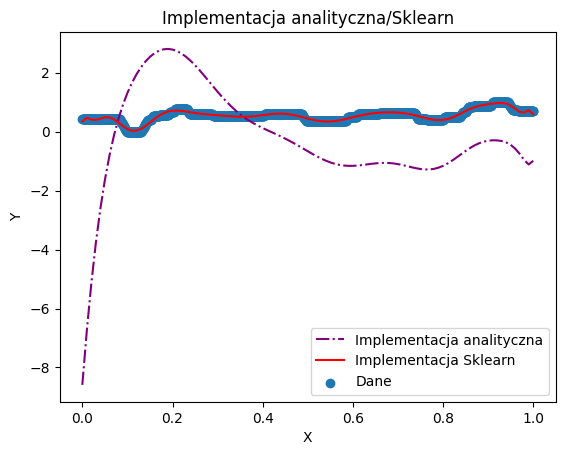

In [52]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=21)
X_poly_A = poly.fit_transform(X_points_N)
teta_A = np.linalg.inv(X_poly_A.T@X_poly_A)@X_poly_A.T@Y_points_N
end = time.time()
print(f"Czas obliczeń implementacji analitycznej = {end - start}")
X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_p = poly.fit_transform(X_test)
y_test = X_test_p@teta_A
plt.plot(X_test, y_test, c="purple", label='Implementacja analityczna', linestyle='-.')
plt.plot(X_test, y_pred, color='r', label='Implementacja Sklearn')
plt.scatter(X_points_N, Y_points_N, label='Dane')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Implementacja analityczna/Sklearn')
plt.legend()
plt.show()

Implementacja regresji na podstawie Sklearn (stopień 9)

In [53]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=9)
X_poly_S = poly.fit_transform(X_points_N)
model = sklearn.linear_model.LinearRegression()
model.fit(X_poly_S, Y_points_N)
teta_S = model.coef_
end = time.time()
print(f"Czas obliczeń implementacji Sklearn = {end - start}")

X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_poly = poly.transform(X_test)
y_pred = model.predict(X_test_poly)

Czas obliczeń implementacji Sklearn = 0.005507469177246094


Implementacja regresji liniowej w sposób analityczny (stopień 9)

Czas obliczeń implementacji analitycznej = 0.0


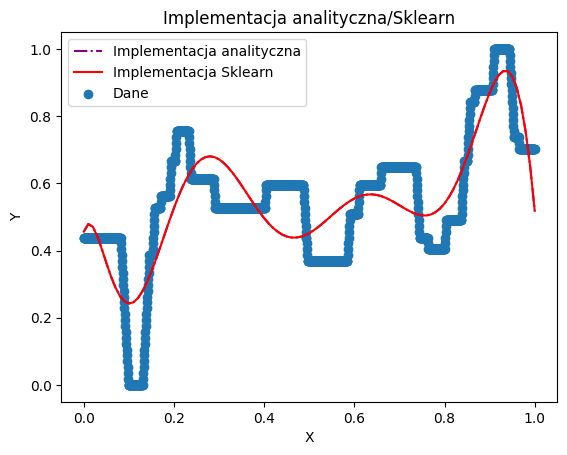

In [54]:
start = time.time()
poly = preprocessing.PolynomialFeatures(degree=9)
X_poly_A = poly.fit_transform(X_points_N)
teta_A = np.linalg.inv(X_poly_A.T@X_poly_A)@X_poly_A.T@Y_points_N
end = time.time()
print(f"Czas obliczeń implementacji analitycznej = {end - start}")
X_test = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_p = poly.fit_transform(X_test)
y_test = X_test_p@teta_A
plt.plot(X_test, y_test, c="purple", label='Implementacja analityczna', linestyle='-.')
plt.plot(X_test, y_pred, color='r', label='Implementacja Sklearn')
plt.scatter(X_points_N, Y_points_N, label='Dane')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Implementacja analityczna/Sklearn')
plt.legend()
plt.show()

Implementacja ridge regression z wykorzystaniem biblioteki Sklearn

In [55]:
start = time.time()
model_R = sklearn.linear_model.Ridge(alpha = 0.000000000003, fit_intercept=False)
poly = preprocessing.PolynomialFeatures(degree=16)
X_poly_R = poly.fit_transform(X_points_N)
model_R.fit(X_poly_R, Y_points_N)
end = time.time()
print(f"Czas obliczeń rozwiązania Sklearn = {end - start}")
teta_R = model_R.coef_
X_test_R = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_test_poly = poly.transform(X_test_R)
y_pred_R = model_R.predict(X_test_poly)

Czas obliczeń rozwiązania Sklearn = 0.0009999275207519531


Własna implementacja ridge regression

[[0.43859649]
 [0.43859649]
 [0.43859649]
 ...
 [0.70175439]
 [0.70175439]
 [0.70175439]]
Czas obliczeń stworzonego rozwiązania = 49.52380585670471


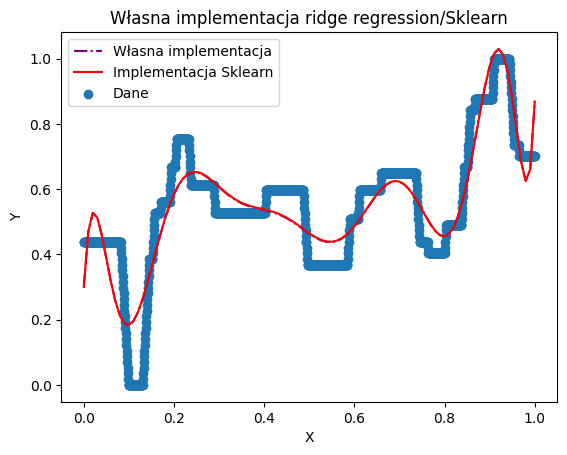

In [57]:
ALFA = 0.000000000003


poly = preprocessing.PolynomialFeatures(degree=16, include_bias=True)
X_poly_T = poly.fit_transform(X_points_N)
print(Y_points_N)
teta_T = np.linalg.inv(X_poly_T.T@X_poly_T+ALFA*np.eye(X_poly_T.shape[1]))@X_poly_T.T@Y_points_N
end = time.time()
print(f"Czas obliczeń stworzonego rozwiązania = {end - start}")
X_test_T = np.linspace(0.0, 1.0, 101).reshape(-1, 1)
X_poly_t = poly.fit_transform(X_test)
y_pred_T = X_poly_t@teta_T

plt.plot(X_test_T, y_pred_T, color='purple', label='Własna implementacja', linestyle='-.')
plt.plot(X_test_R, y_pred_R, c="r", label='Implementacja Sklearn')
plt.scatter(X_points_N, Y_points_N, label='Dane')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Własna implementacja ridge regression/Sklearn')
plt.legend()
plt.show()